In [1]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from mpi4py import MPI

from lib.config import IniFile
from lib.model import Model
from lib.integrator import Integrator
from lib.sampler import Sampler
from lib.output import Output

In [2]:
def run_sim(init_file_str):
    
    ini = IniFile(init_file_str)
    
    comm = MPI.COMM_WORLD
    myModel = Model(ini, comm)
    myModel.config()
    
    myOutput = Output(ini, comm, myModel)
    myOutput.config()
    
    myIntegrator = Integrator(ini, comm, myModel, myOutput)
    myIntegrator.config()
    
    mySampler = Sampler(ini, comm, myModel, myIntegrator, myOutput)
    mySampler.config()
    
    mySampler.run() 
     
    myOutput.save()

In [3]:
run_sim('test/test1.ini')

## Output to test/test1
0


In [4]:
mag = np.loadtxt('test/test1/m.0')
le = np.loadtxt('test/test1/le.0')
freq = np.loadtxt('test/test1/f.0')

print mag

print mag.shape
print freq.shape

[[0.99124 0.99511 0.99585 ... 0.97637 0.97074 0.96124]
 [0.98254 0.9875  0.99618 ... 0.9745  0.96439 0.96188]
 [0.98503 0.99114 0.9977  ... 0.96121 0.9714  0.96674]
 ...
 [1.      1.      1.      ... 1.      1.      1.     ]
 [1.      1.      1.      ... 1.      1.      1.     ]
 [1.      1.      1.      ... 1.      1.      1.     ]]
(145, 36001)
(145, 36001)


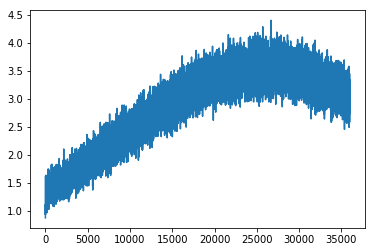

In [5]:
plt.plot(le[160])

4.399

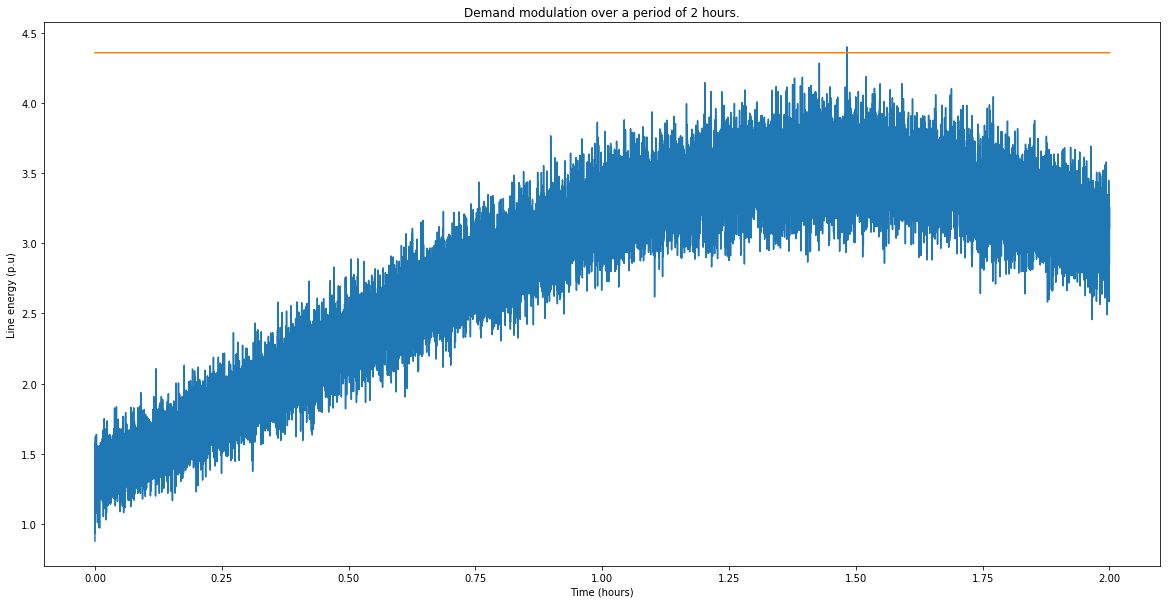

In [ ]:
threshold_val = 4.3575

fig = plt.figure(figsize = (20, 10))
time = np.linspace(0, 2.0, le.shape[1])
threshold = threshold_val * np.ones(le.shape[1])


#for i in range(le.shape[0]):
#    plt.plot(time, le[i], label = ("Line %i" % (i)))

plt.plot(time, le[160])
plt.plot(time, threshold)

plt.xlabel('Time (hours)')
plt.ylabel('Line energy (p.u)')
plt.title('Demand modulation over a period of 2 hours.')
#plt.savefig('line_modulation.png')
#plt.legend()
max(le[160])

In [ ]:
ls = np.loadtxt('test/test1/g.0')
print ls
for i in range(ls.shape[0]):
    plt.plot(time, ls[i], label = ("Line %i" % (i)))

In [ ]:
time = np.linspace(0, 3600, 1000)
omega = np.pi/(1.5*3600)
x = np.sin(time*omega)

plt.plot(time, x)